## QNC Presentation 2 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, chi2_contingency
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import GofChisquarePower

/Users/iturco/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


                Pass  Fail
ASHS-Madgeburg    28    25
ASHS-Utrecht      28    25


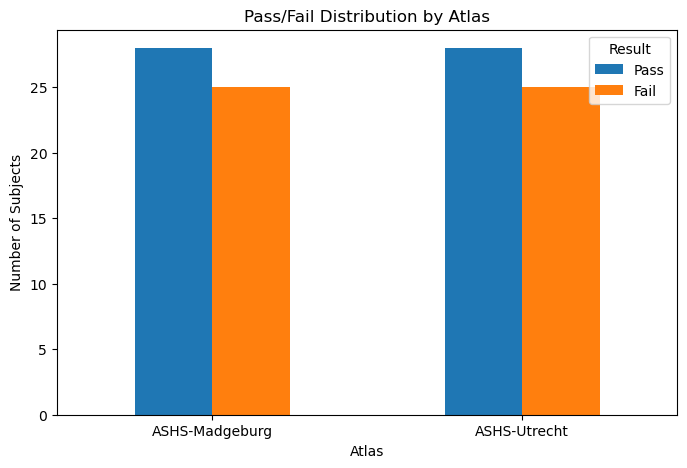

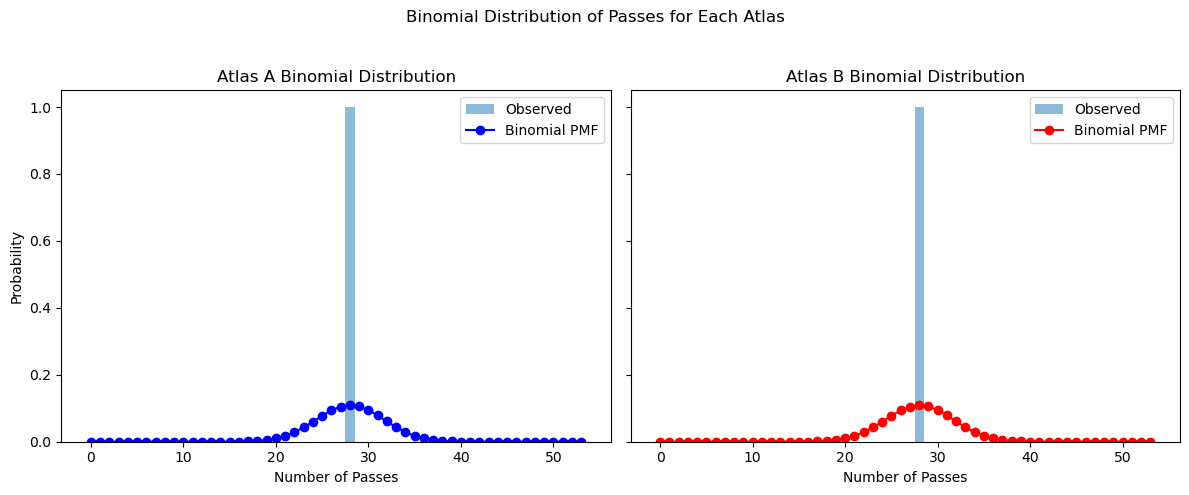

Chi-square Statistic: 0.00, p-value: 1.0000
No statistically significant difference between the atlases.


In [2]:
# Simulation parameters
n_subjects = 53 
atlas_names = ["ASHS-Madgeburg", "ASHS-Utrecht"]
pass_prob_ashs_madgeburg = 0.5
pass_prob_ashs_utrecht = 0.5

# Simulate results
np.random.seed(42)
results = {
    "Subject": np.arange(1, n_subjects + 1),
    "ASHS-Madgeburg": np.random.choice(["Pass", "Fail"], n_subjects, p=[pass_prob_ashs_madgeburg, 1 - pass_prob_ashs_madgeburg]),
    "ASHS-Utrecht": np.random.choice(["Pass", "Fail"], n_subjects, p=[pass_prob_ashs_utrecht, 1 - pass_prob_ashs_utrecht]),
}
df = pd.DataFrame(results)

# Calculate distributions
distribution = df.drop(columns="Subject").apply(lambda x: x.value_counts()).fillna(0)
distribution = distribution.T
print(distribution)

# Visualize distribution
ax = distribution.plot(kind="bar", figsize=(8, 5), stacked=False)
plt.title("Pass/Fail Distribution by Atlas")
plt.ylabel("Number of Subjects")
plt.xlabel("Atlas")
plt.xticks(ticks=range(len(atlas_names)), labels=atlas_names, rotation=0)
plt.legend(title="Result", loc="upper right")
plt.show()

# Number of subjects and observed pass counts
n_subjects = df.shape[0]  # total trials
n_pass_ashs_madgeburg = (df["ASHS-Madgeburg"] == "Pass").sum()
n_pass_ashs_utrecht = (df["ASHS-Utrecht"] == "Pass").sum()

# Probability of success for each atlas
p_ashs_madgeburg = n_pass_ashs_madgeburg / n_subjects
p_ashs_utrecht = n_pass_ashs_utrecht / n_subjects

# Define range for binomial distributions (0 to n_subjects)
x = np.arange(0, n_subjects + 1)

# Binomial distributions
binom_pmf_ashs_madgeburg = binom.pmf(x, n_subjects, p_ashs_madgeburg)
binom_pmf_ashs_utrecht = binom.pmf(x, n_subjects, p_ashs_utrecht)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Atlas A
axes[0].hist(n_pass_ashs_madgeburg, bins=np.arange(-0.5, n_subjects + 1, 1), density=True, alpha=0.5, label="Observed")
axes[0].plot(x, binom_pmf_ashs_madgeburg, 'bo-', label="Binomial PMF")
axes[0].set_title("Atlas A Binomial Distribution")
axes[0].set_xlabel("Number of Passes")
axes[0].set_ylabel("Probability")
axes[0].legend()

# Atlas B
axes[1].hist(n_pass_ashs_utrecht, bins=np.arange(-0.5, n_subjects + 1, 1), density=True, alpha=0.5, label="Observed")
axes[1].plot(x, binom_pmf_ashs_utrecht, 'ro-', label="Binomial PMF")
axes[1].set_title("Atlas B Binomial Distribution")
axes[1].set_xlabel("Number of Passes")
axes[1].legend()

plt.suptitle("Binomial Distribution of Passes for Each Atlas")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Chi-square test
contingency_table = distribution[['Pass', 'Fail']].to_numpy()
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2:.2f}, p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between the atlases.")
else:
    print("No statistically significant difference between the atlases.")


In [9]:
# Using a large effect size (w = 0.5) for chi-square test
effect_sizes = np.arange(0.1,0.9,0.1)
alpha = 0.05
power = 0.8

# Chi-Square Power Analysis
chi2_power_analysis = GofChisquarePower()
for effect_size in effect_sizes: 
    sample_size = chi2_power_analysis.solve_power(effect_size=effect_size, nobs=None, alpha=alpha, power=power)

    print(f"For Effect Size {effect_size} Required Total Sample Size for Chi-Square Test: {np.ceil(sample_size):.0f}")


For Effect Size 0.1 Required Total Sample Size for Chi-Square Test: 785
For Effect Size 0.2 Required Total Sample Size for Chi-Square Test: 197
For Effect Size 0.30000000000000004 Required Total Sample Size for Chi-Square Test: 88
For Effect Size 0.4 Required Total Sample Size for Chi-Square Test: 50
For Effect Size 0.5 Required Total Sample Size for Chi-Square Test: 32
For Effect Size 0.6 Required Total Sample Size for Chi-Square Test: 22
For Effect Size 0.7000000000000001 Required Total Sample Size for Chi-Square Test: 17
For Effect Size 0.8 Required Total Sample Size for Chi-Square Test: 13
